#  The Sparks Foundation Internship

# Task 1 : Prediction using Decision Tree Algorithm

# Dependencies

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
iris=pd.read_csv('Iris.csv')

# Data Summary

In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.shape

(150, 6)

In [15]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
iris.duplicated().sum()

0

<Axes: >

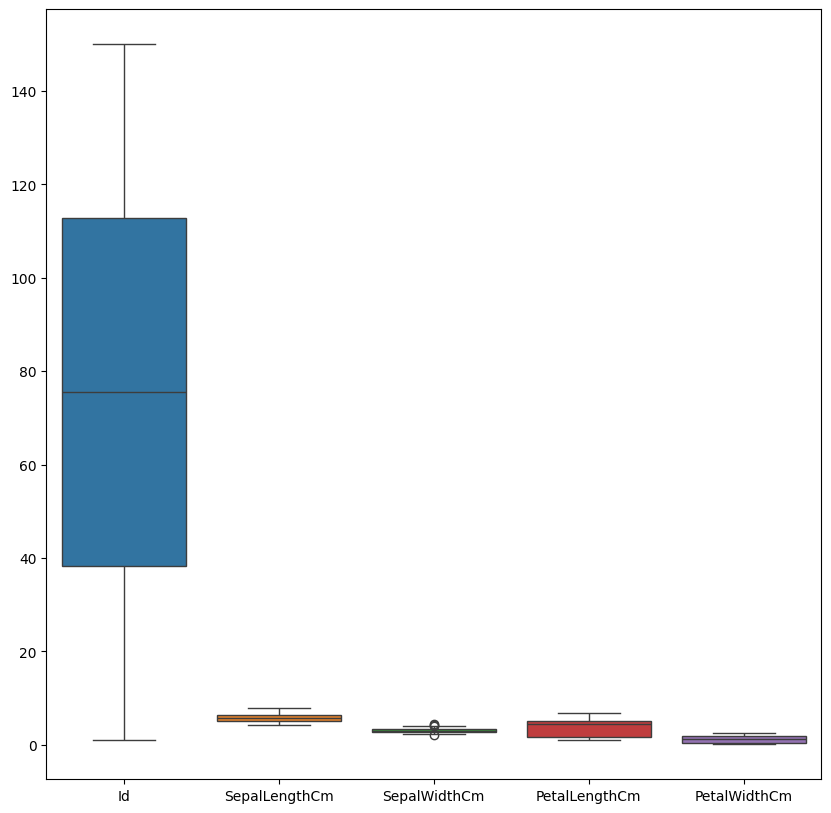

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(iris)

# Detecting Outliers using the IQR Method

In [28]:
features=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [56]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 20)
    q3 = np.percentile(data, 80)

    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)



    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in iris[features]:
    outliers = detect_outliers_iqr(iris[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Id attribute : []
Outliers in SepalLengthCm attribute : []
Outliers in SepalWidthCm attribute : []
Outliers in PetalLengthCm attribute : []
Outliers in PetalWidthCm attribute : []


## After analysis, we found that there are no outliers in our dataset.

# Data Visualization using Scatter Plot

## Basic Scatter Plot

Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')

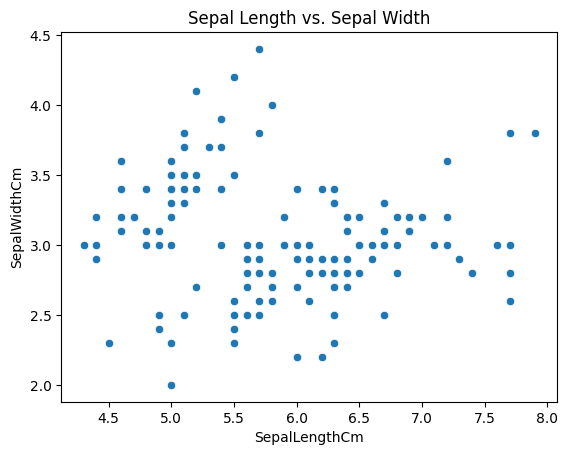

In [9]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris)
plt.title('Sepal Length vs. Sepal Width')

# Scatter Plot with Regression Fit

Text(0.5, 1.0, 'Sepal Length vs. Sepal Width with Regression Fit')

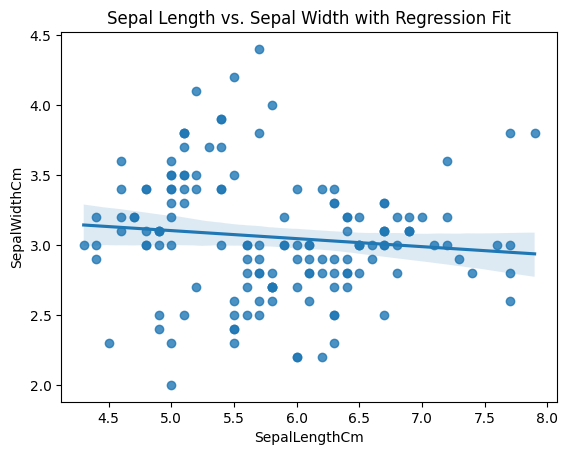

In [51]:
sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=iris)
plt.title('Sepal Length vs. Sepal Width with Regression Fit')

# Scatter Plot - Category


## 1. SepalLength vs SepalWidth

Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')

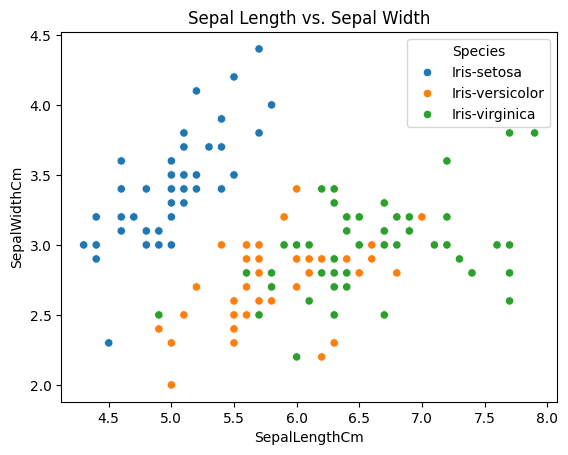

In [50]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)
plt.title('Sepal Length vs. Sepal Width')

## 2. SepalLength vs Width

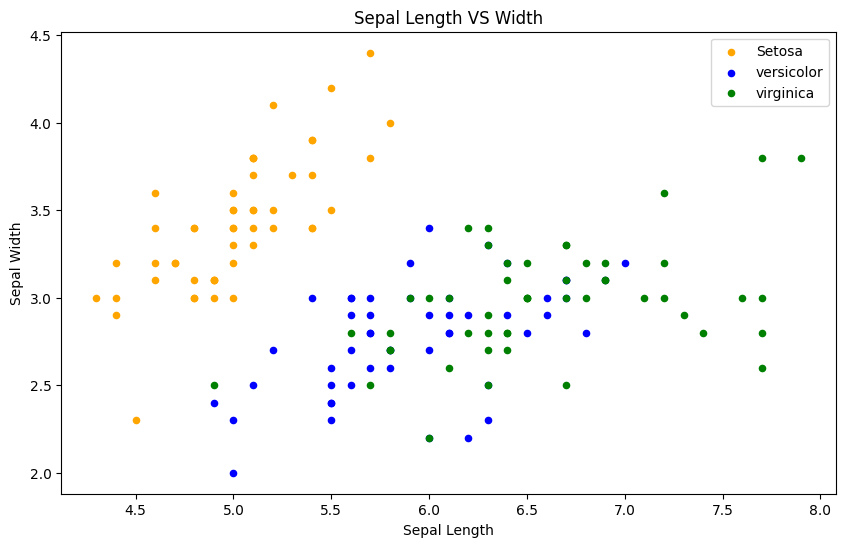

In [49]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## 3. PetalLength vs Width

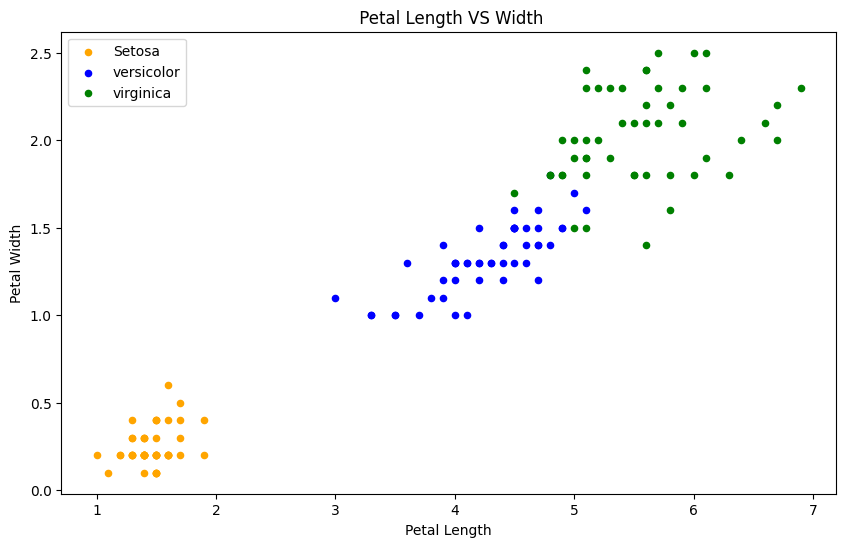

In [52]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# Distribution of Length and Width

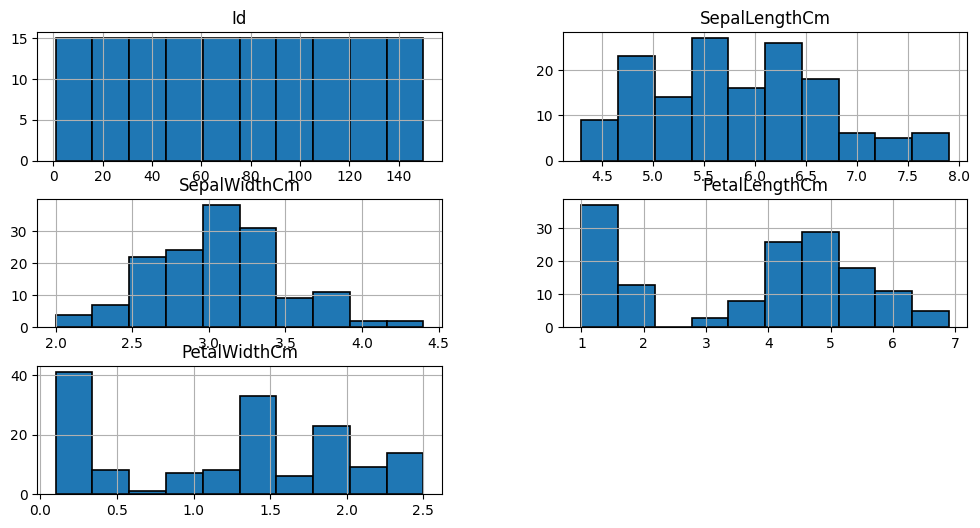

In [53]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

 # Variation of Length and Width  according to the Species

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

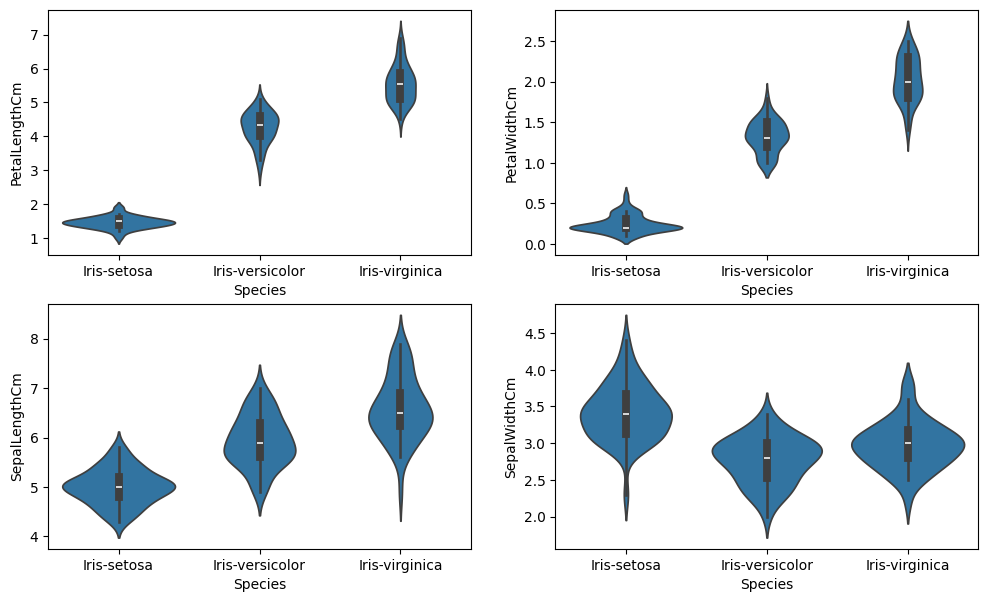

In [55]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

# Line Plot

## 1. SepalLengthCm vs SepalWidthCm

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

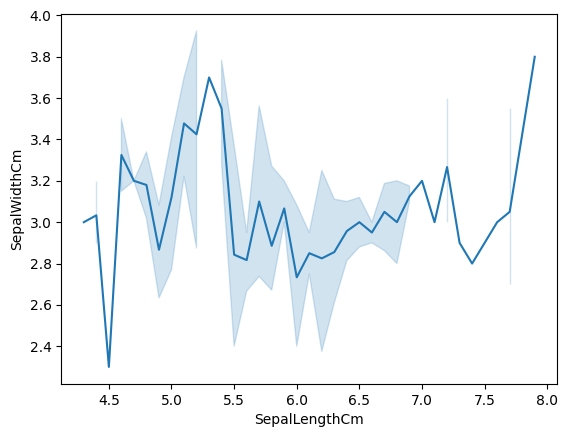

In [57]:
sns.lineplot(x='SepalLengthCm', y='SepalWidthCm', data=iris)

## 2. PetalLengthCm vs PetalWidthCm

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

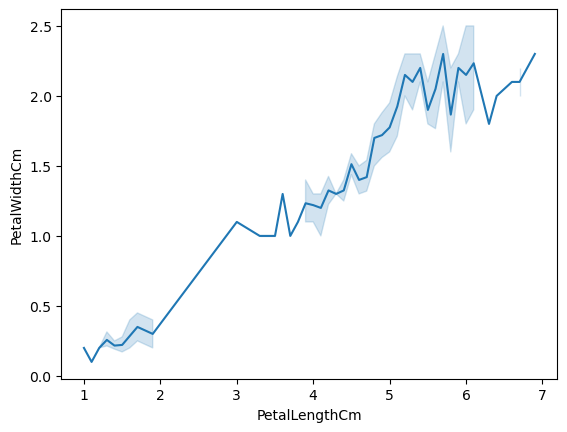

In [ ]:
sns.lineplot(x='PetalLengthCm', y='PetalWidthCm', data=iris)

# Basic Histogram Plot

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

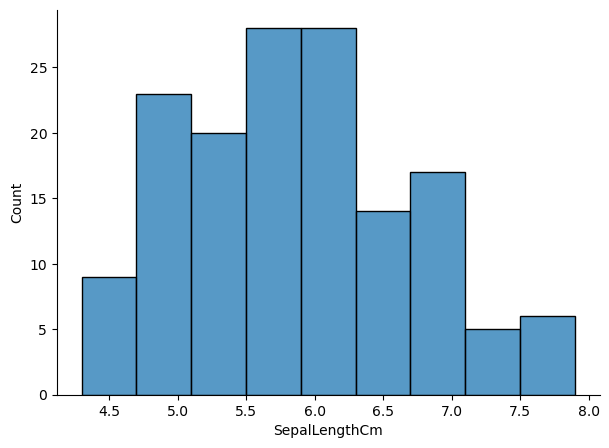

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(iris['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

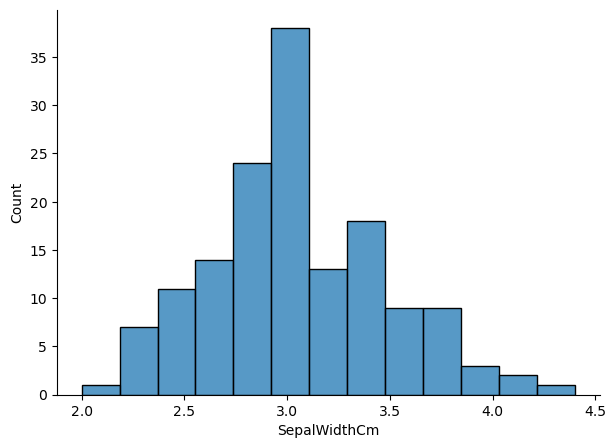

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(iris['SepalWidthCm'])

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

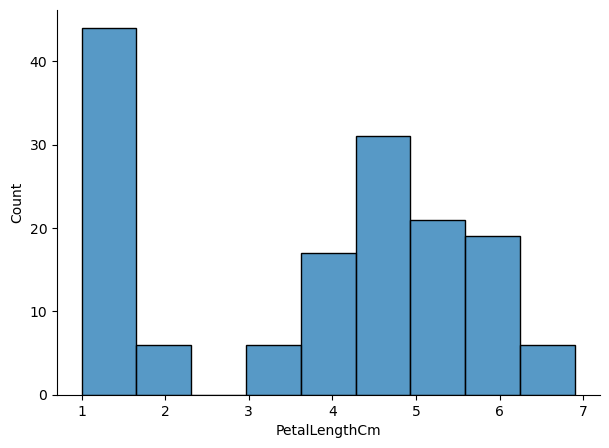

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(iris['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

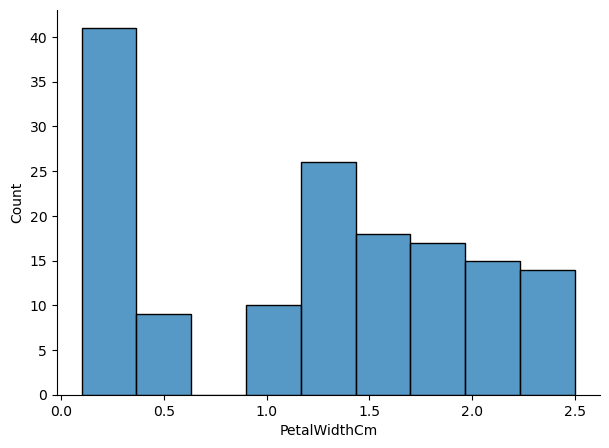

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(iris['PetalWidthCm'])


# Heatmap

<ipython-input-48-af3a8d7e8b5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')


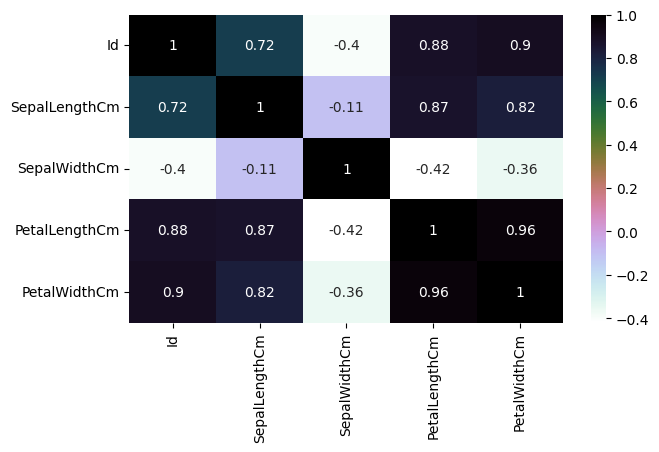

In [48]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

# MODEL TRAINING AND EVALUATION

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [39]:
X=iris.drop(columns=["Id","Species"])
y=iris.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [35]:
def model_eval(model, X_train,X_test,y_train,y_test, model_name):
  pred_train = model.predict(X_train)
  print("Classification Report is for train set: \n",classification_report(y_train,pred_train))
  print('\n')
  pred_test = model.predict(X_test)
  print("Classification Report is for test set: \n",classification_report(y_test,pred_test))
  print('\n')

  result =  accuracy_score(y_test,pred_test)
  result = (result * 100).round(2).astype(str) + '%'
  print("Accuracy of the model is: ",result)

In [42]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
predict=dt.predict(X_test)

In [44]:
model_eval(dt, X_train, X_test, y_train, y_test, 'Decision Tree Classifier')

Classification Report is for train set: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        41

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



Classification Report is for test set: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Accuracy of the model is:  93.33%


## Thus the accuracy of our Model comes out to be 93.33%.

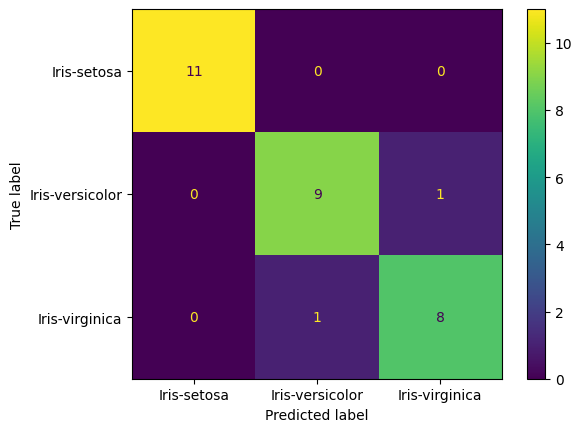

In [45]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)
plt.show()

# Plotting Decision Tree

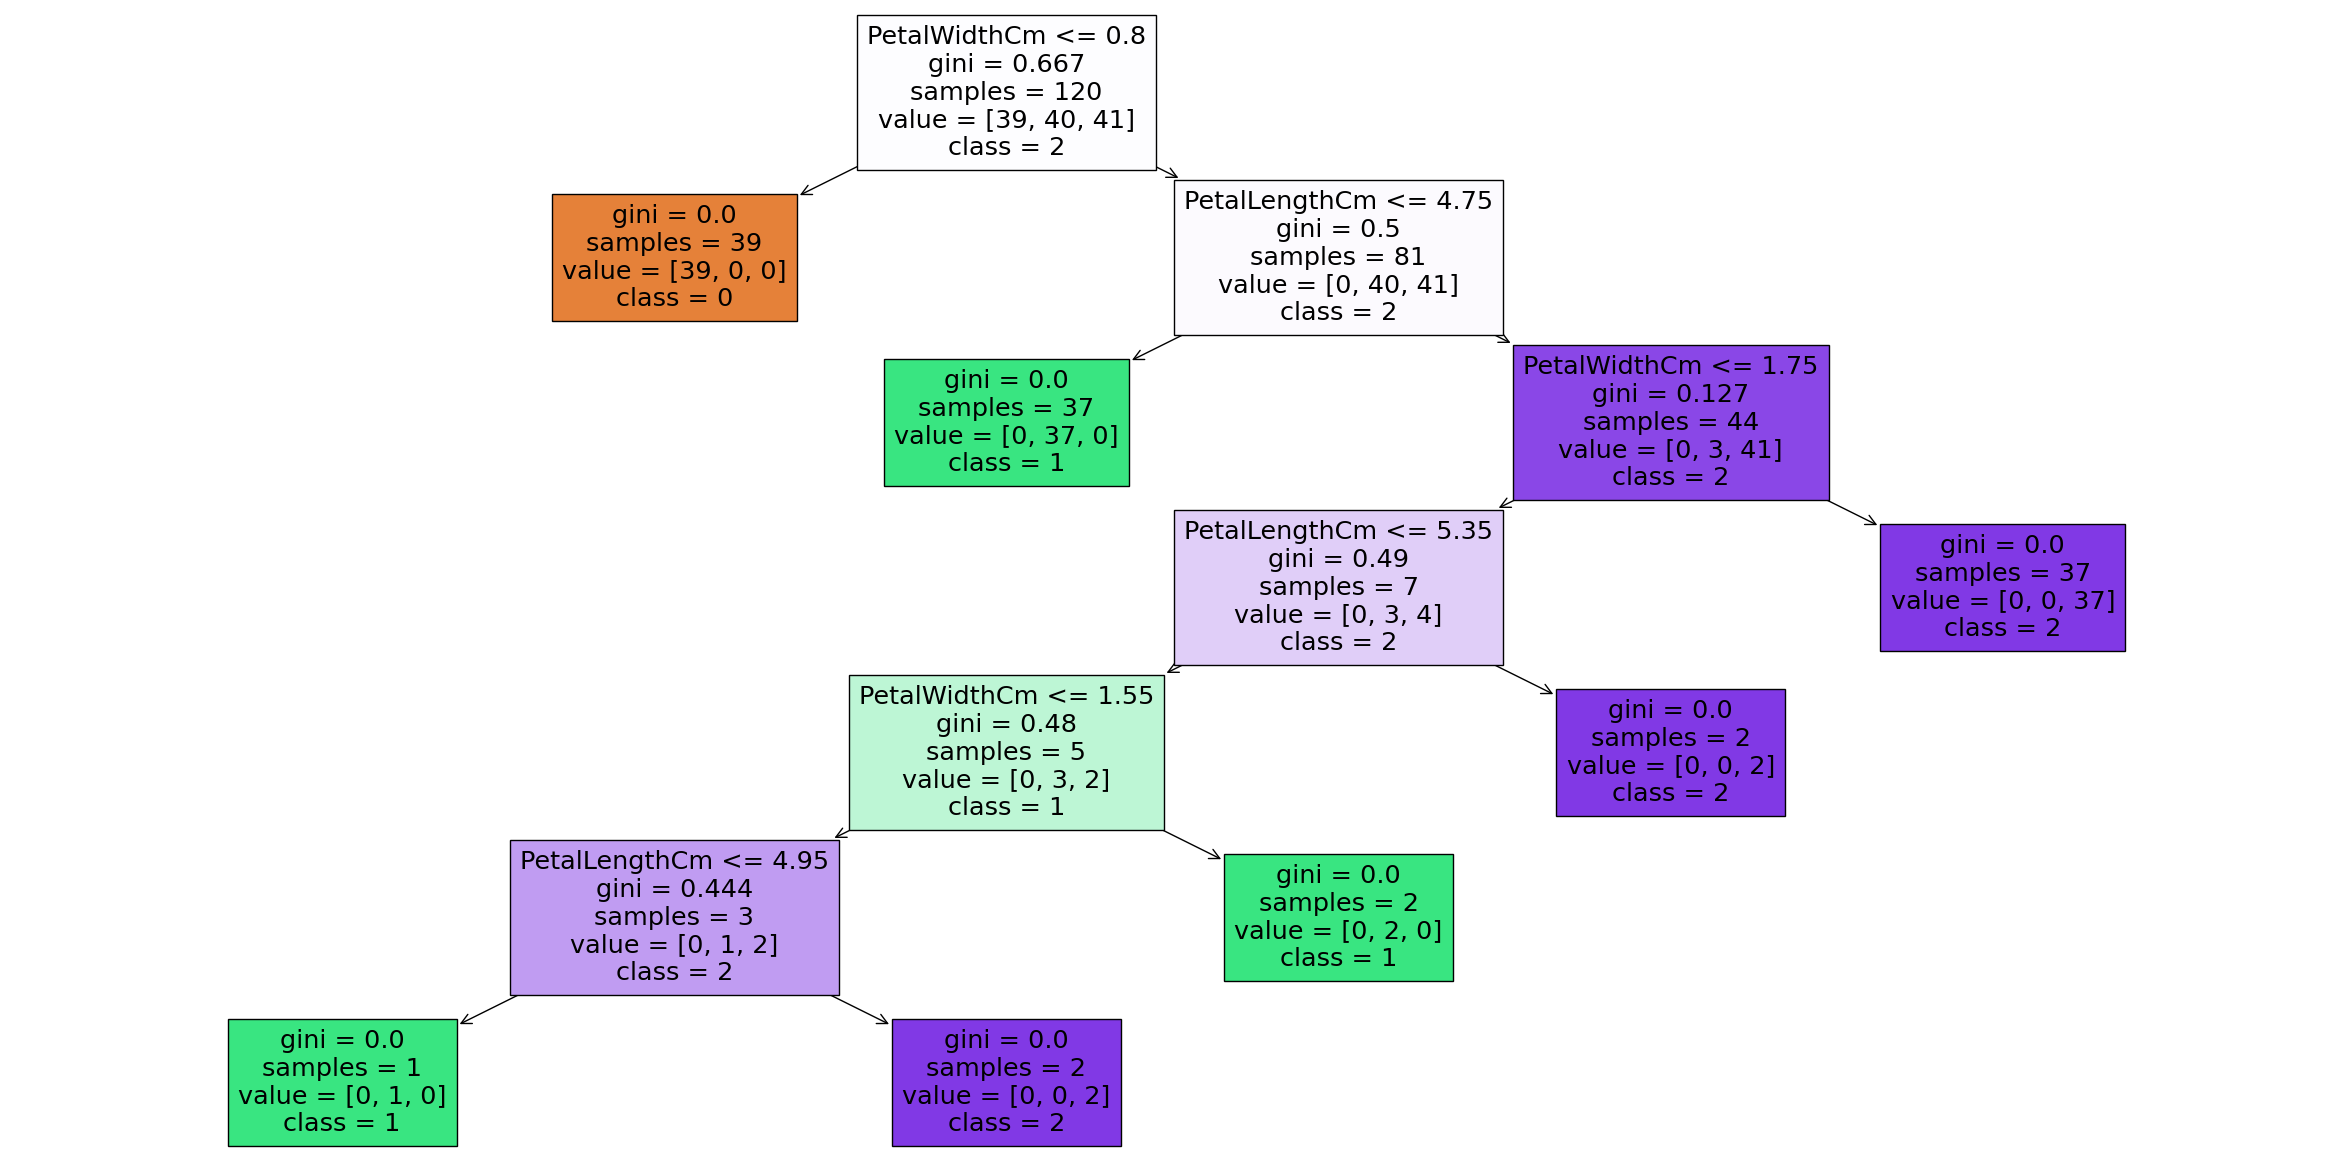

In [58]:
from sklearn import tree
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (dt, feature_names = feature_names, class_names = target_names, filled = True)

### We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.

## In conclusion, this task centered around the Iris dataset encompassed comprehensive data cleaning, exploratory data analysis (EDA), and meticulous model evaluation. The process involved a meticulous approach, including the division of data into training and testing sets, the selection of a Decision Tree Classifier, and subsequent model evaluation. The outcome was a well-annotated decision tree constructed with the Gini index.



## This hands-on experience with machine learning applied to the Iris dataset provided valuable insights into various facets of machine learning. It significantly expanded my horizon, reinforcing my commitment to continuous learning and adapting to new challenges in the field.